In [ ]:
from typing import List
from typing import Tuple
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from tqdm import tqdm

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ouladsayadyounes/WildFires/master/WildFires_DataSet.csv")
scale_factor = 0.02
data['LST_Celsius'] = (data['LST'] * scale_factor) - 273.15
data['LST_Kelvin'] = data['LST'] * scale_factor
data['CLASS_binary'] = data['CLASS'].map({'fire': 1, 'no_fire': 0})
data

,NDVI,LST,BURNED_AREA,CLASS,LST_Celsius,LST_Kelvin,CLASS_binary
0,0.506782,14584.272727,4.692308,no_fire,18.535455,291.685455,0
1,0.522150,14655.833333,5.000000,no_fire,19.966667,293.116667,0
2,0.682284,14780.000000,5.000000,fire,22.450000,295.600000,1
3,0.120046,13298.500000,3.500000,no_fire,-7.180000,265.970000,0
4,0.568734,14743.000000,5.000000,no_fire,21.710000,294.860000,0
...,...,...,...,...,...,...,...
1708,0.621721,14406.000000,5.000000,no_fire,14.970000,288.120000,0
1709,0.709715,14330.400000,4.851852,no_fire,13.458000,286.608000,0
1710,0.613000,14751.500000,3.000000,fire,21.880000,295.030000,1
1711,0.614471,13611.000000,4.921053,no_fire,-0.930000,272.220000,0


<ipython-input-23-903fb81b3050>:11: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7df80b1aa020> starts with '_'. It is thus excluded from the legend.
  plt.gca().legend(['_', '_', 'Fire', 'No Fire'], prop={'size': 15})
<ipython-input-23-903fb81b3050>:11: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7df80b1a9ff0> starts with '_'. It is thus excluded from the legend.
  plt.gca().legend(['_', '_', 'Fire', 'No Fire'], prop={'size': 15})


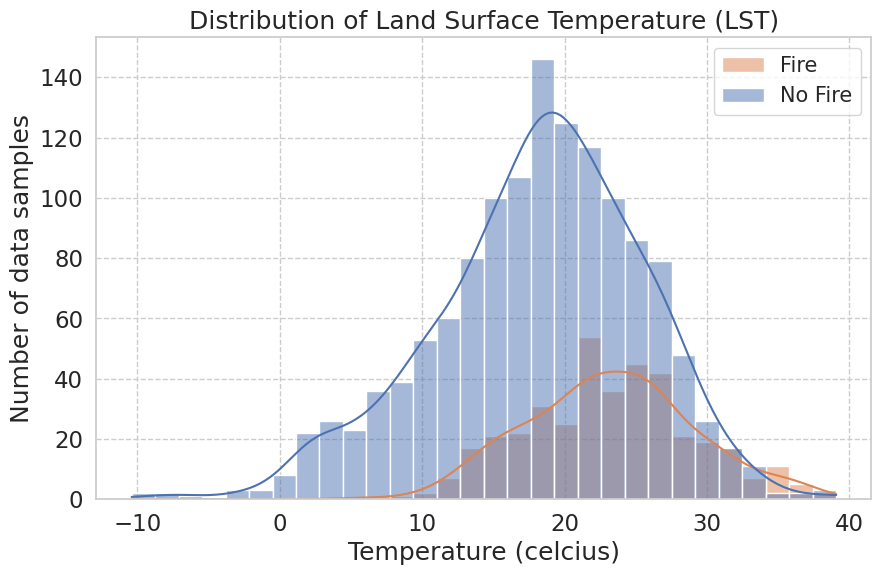

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# LST: Land Surface Temperature, NDVI: Normalized Difference Vegetation Index

plt.figure(figsize=(10, 6))
sns.histplot(x="LST_Celsius", data=data, hue='CLASS', bins=30, kde=True)
plt.title('Distribution of Land Surface Temperature (LST)')
plt.xlabel('Temperature (celcius)')
plt.ylabel('Number of data samples')
plt.gca().legend(['_', '_', 'Fire', 'No Fire'], prop={'size': 15})
plt.show()

<ipython-input-26-3eb46444dbeb>:11: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7df80ae8e350> starts with '_'. It is thus excluded from the legend.
  plt.gca().legend(['_', '_', 'Fire', 'No Fire'], prop={'size': 15})
<ipython-input-26-3eb46444dbeb>:11: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7df80ae8e320> starts with '_'. It is thus excluded from the legend.
  plt.gca().legend(['_', '_', 'Fire', 'No Fire'], prop={'size': 15})


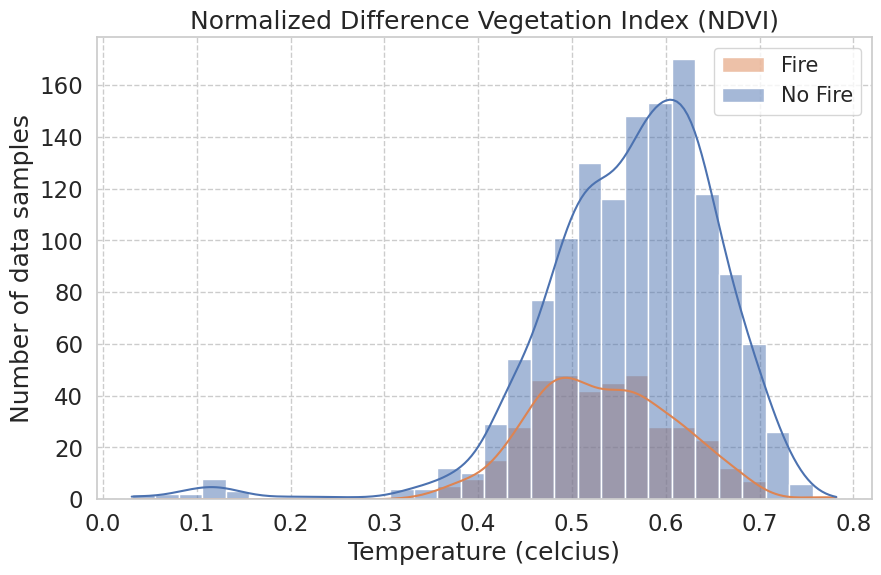

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# LST: Land Surface Temperature, NDVI: Normalized Difference Vegetation Index

plt.figure(figsize=(10, 6))
sns.histplot(x="NDVI", data=data, hue='CLASS', bins=30, kde=True)
plt.title('Normalized Difference Vegetation Index (NDVI)')
plt.xlabel('Temperature (celcius)')
plt.ylabel('Number of data samples')
plt.gca().legend(['_', '_', 'Fire', 'No Fire'], prop={'size': 15})
plt.show()

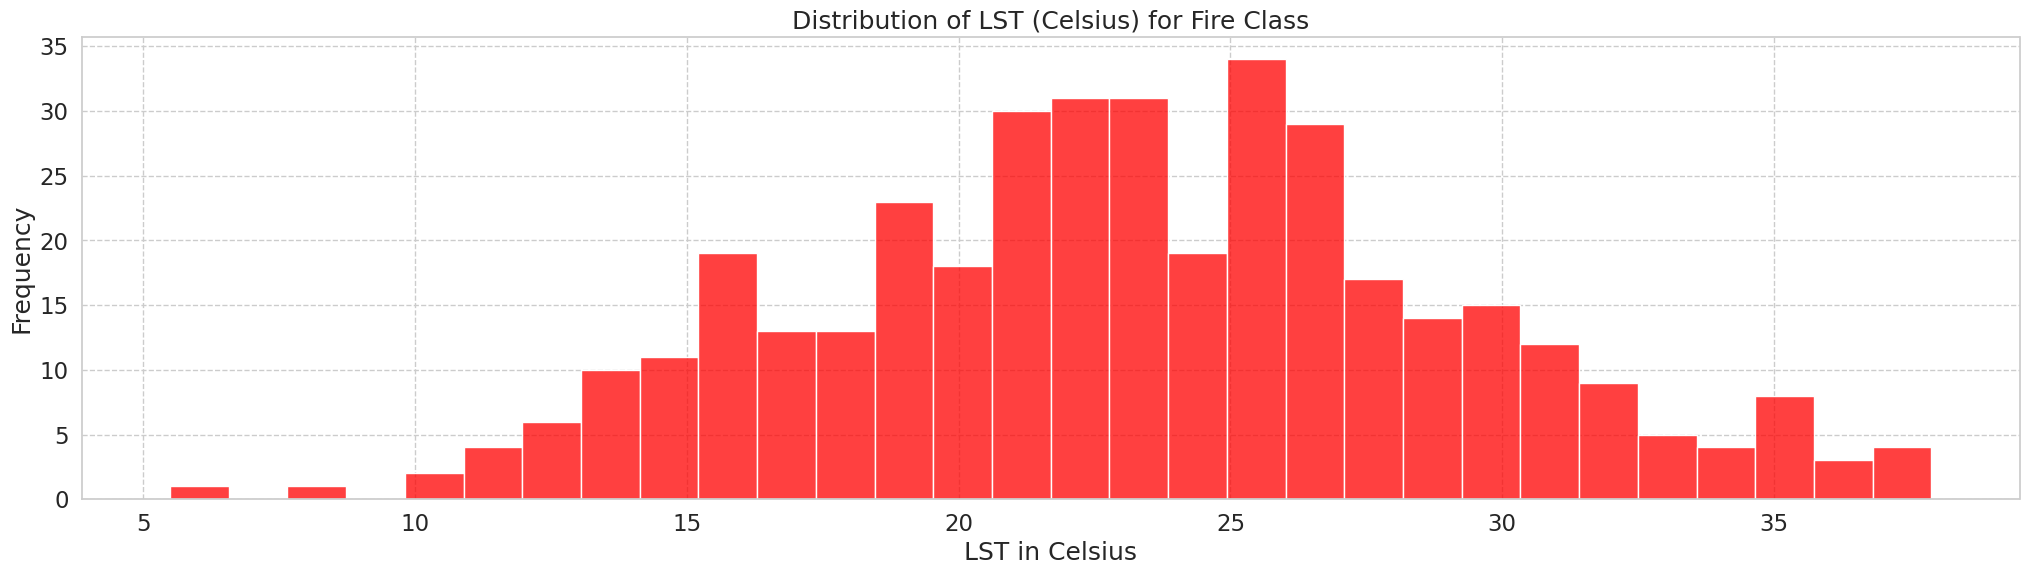

In [ ]:
fire_data = data[data['CLASS'] == 'fire']

# class = fire
plt.figure(figsize=(25, 6))
sns.histplot(fire_data['LST_Celsius'], color='red', bins=30)
plt.title('Distribution of LST (Celsius) for Fire Class')
plt.xlabel('LST in Celsius')
plt.ylabel('Frequency')
plt.show()

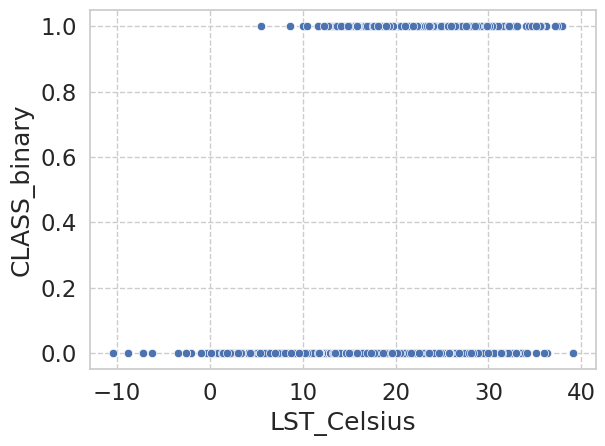

In [ ]:
plt.figure()
sns.scatterplot(x="LST_Celsius", y="CLASS_binary", data=data)
plt.tight_layout()

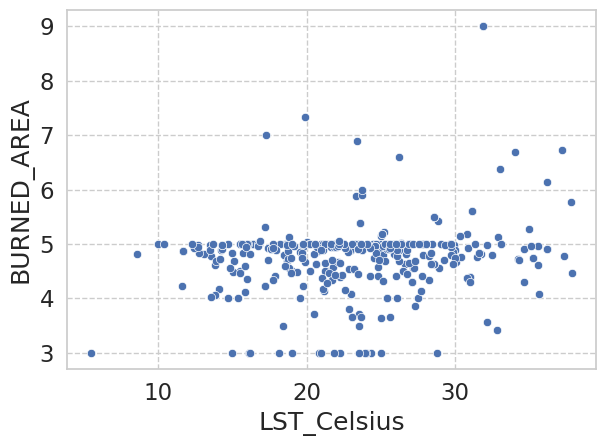

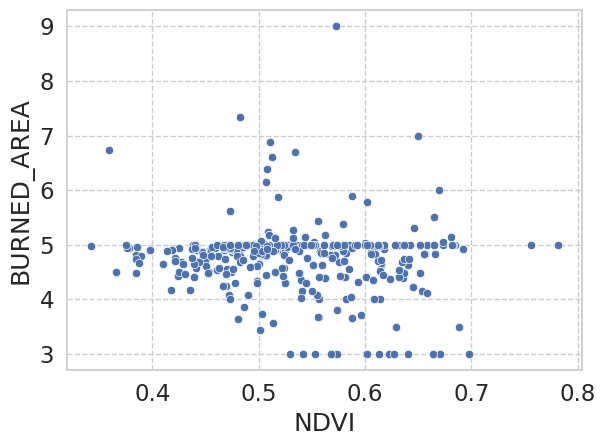

In [ ]:
# correlations
continuous_variables = [
    "LST_Celsius",
    "NDVI"
]

for variable in continuous_variables:
    plt.figure()
    sns.scatterplot(x=variable, y="BURNED_AREA", data=fire_data)
    plt.tight_layout()

In [ ]:
##import matplotlib.pyplot as plt
##import geopandas as gpd

# Load the shapefile of US states
##usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
##usa = usa[usa['continent'] == 'North America'][['name', 'geometry']]

# Filter out non-mainland states for simplicity (Alaska, Hawaii, etc.)
##usa_mainland = usa[(usa['name'] != 'Alaska') & (usa['name'] != 'Hawaii')]

# Plotting
##fig, ax = plt.subplots(figsize=(10, 6))
##usa_mainland.plot(ax=ax, color='lightblue', edgecolor='black')

In [ ]:
##import geopandas as gpd
##import matplotlib.pyplot as plt

# Load the shapefile of US states
##usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for California
##california = usa[usa['name'] == 'United States of America']

# Assuming 'STATE' is the column name for the state information in your DataFrame
##california_data = data[data['STATE'] == 'CA']

# Plotting
##fig, ax = plt.subplots(figsize=(10, 6))

# Plot the California state map
##california.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the data points within California
##for index, row in california_data.iterrows():
##    plt.scatter(row['LONGITUDE'], row['LATITUDE'], s=20, edgecolors='black', linewidths=0.5, color='red')

##ax.set_title('Map of California with Multiple Locations')
##plt.show()


In [ ]:
"""
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(25, 6))

# Define the FIRE_SIZE_CLASS categories and corresponding size ranges
fire_size_classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
size_ranges = {
    'A': '0-0.25 acres',
    'B': '0.26-9.9 acres',
    'C': '10-99.9 acres',
    'D': '100-299 acres',
    'E': '300-999 acres',
    'F': '1000-4999 acres',
    'G': 'greater than 5000 acres'
}

# Create the histogram plot with custom x-axis labels
ax = sns.histplot(x="FIRE_SIZE_CLASS", data=data, bins=len(fire_size_classes), discrete=True)

# Add counts above each bar
for p, label in zip(ax.patches, data['FIRE_SIZE_CLASS'].value_counts()):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set custom x-axis labels
ax.set_xticks(range(len(fire_size_classes)))
ax.set_xticklabels([size_ranges[cls] for cls in fire_size_classes])

# Set x-axis label
ax.set_xlabel("FIRE SIZE CLASS IN ACRES")

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()
"""

'\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Set the size of the figure\nplt.figure(figsize=(25, 6))\n\n# Define the FIRE_SIZE_CLASS categories and corresponding size ranges\nfire_size_classes = [\'A\', \'B\', \'C\', \'D\', \'E\', \'F\', \'G\']\nsize_ranges = {\n    \'A\': \'0-0.25 acres\',\n    \'B\': \'0.26-9.9 acres\',\n    \'C\': \'10-99.9 acres\',\n    \'D\': \'100-299 acres\',\n    \'E\': \'300-999 acres\',\n    \'F\': \'1000-4999 acres\',\n    \'G\': \'greater than 5000 acres\'\n}\n\n# Create the histogram plot with custom x-axis labels\nax = sns.histplot(x="FIRE_SIZE_CLASS", data=data, bins=len(fire_size_classes), discrete=True)\n\n# Add counts above each bar\nfor p, label in zip(ax.patches, data[\'FIRE_SIZE_CLASS\'].value_counts()):\n    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha=\'center\', va=\'center\', xytext=(0, 10), textcoords=\'offset points\')\n\n# Set custom x-axis labels\nax.set_xticks(range(len(fire_size_classes)))\nax.

In [ ]:
"""
pip install GitPython
"""

'\npip install GitPython\n'

In [ ]:
"""
import git
import sys

# Specify the GitHub repository URL
repo_url = 'https://github.com/ZhuofeiL/Wild-fire.git'

# Specify the local directory where you want to clone the repository
local_dir = 'Wild-fire'

# Clone the repository
repo = git.Repo.clone_from(repo_url, local_dir)

# Add the local directory to the sys.path to make it importable
sys.path.append(local_dir)

# Now you can import the code from the repository
# For example, if there is a module named 'my_module' in the repository, you can do:
# from my_module import some_function

# Example:
# from Wild-fire import some_module

# Note: Make sure to replace 'some_module' with the actual module or file you want to import.

"""

"\nimport git\nimport sys\n\n# Specify the GitHub repository URL\nrepo_url = 'https://github.com/ZhuofeiL/Wild-fire.git'\n\n# Specify the local directory where you want to clone the repository\nlocal_dir = 'Wild-fire'\n\n# Clone the repository\nrepo = git.Repo.clone_from(repo_url, local_dir)\n\n# Add the local directory to the sys.path to make it importable\nsys.path.append(local_dir)\n\n# Now you can import the code from the repository\n# For example, if there is a module named 'my_module' in the repository, you can do:\n# from my_module import some_function\n\n# Example:\n# from Wild-fire import some_module\n\n# Note: Make sure to replace 'some_module' with the actual module or file you want to import.\n\n"